In [1]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import os
import sys

In [2]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

In [3]:
from imp import reload
import read_annotations
reload(read_annotations);

In [4]:
ANNOTATIONS_DIR = '/home/mteruel/am/data/echr/annotation/'
ANNOTATORS = {
    'M': {'dirname': 'M'},
    'L': {'dirname': 'L'},
    'S': {'dirname': 'S'},
    'C': {'dirname': 'C'}
}

### Find files to compare

Find pairs of files annotated for more than one annotator.

In [19]:
document_pairs, all_files = read_annotations.get_annotated_documents(ANNOTATIONS_DIR, ANNOTATORS)
document_pairs, all_files

([(Case: TALMANE v. LATVIA - Ann: M, Case: TALMANE v. LATVIA - Ann: C),
  (Case: PERUS v. SLOVENIA - Ann: S, Case: PERUS v. SLOVENIA - Ann: L),
  (Case: ALKASI v. TURKEY - Ann: S, Case: ALKASI v. TURKEY - Ann: L),
  (Case: ALKASI v. TURKEY - Ann: S, Case: ALKASI v. TURKEY - Ann: M),
  (Case: ALKASI v. TURKEY - Ann: S, Case: ALKASI v. TURKEY - Ann: C),
  (Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: M),
  (Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: C),
  (Case: ALKASI v. TURKEY - Ann: M, Case: ALKASI v. TURKEY - Ann: C)],
 {'C': Case: ALKASI v. TURKEY - Ann: C,
  'L': Case: ALKASI v. TURKEY - Ann: L,
  'M': Case: ALKASI v. TURKEY - Ann: M,
  'S': Case: ALKASI v. TURKEY - Ann: S})

In [6]:
STYLES = {'claim': 'red', 'premise': 'green', 'major-claim': 'blue'}

In [11]:
print(list(all_files.values())[0].sample_labeled_text(35, STYLES))

18 . The applicant complained that the {refusal of the Senate of the Supreme Court to examine her appeal on points of law without a reasoned decision infringed her right to a fair hearing as provided in Article 6 § 1 of the Convention , }which in its relevant part reads as follows : 

“In {the determination of ... any criminal charge against him , everyone is entitled to a fair ... hearing ... by [ a ] ... tribunal ... ” }

19 . The Government argued that the {applicant had failed to exhaust domestic remedies . }

Specifically , {she had not asked the prosecutor to lodge an appeal ( protests ) against the judgment of 13 February 2007 , as provided for under chapter 63 of the Criminal Procedure Law , which set out conditions for the review of judgments and decisions which have entered into force }( see paragraph 13 above ) . 

21 . According to the Court’s case-law , the {applicants are only obliged to use an effective remedy that is actually available in theory and in practice at the r

# Inter annotator agreement

In [8]:
import show_metrics
reload(show_metrics);

## Sentence level comparison

We compare the agreement on classifying argumentative vs non argumentative sentences

Krippendorff Alpha: 0.8172357045175347
Fleiss Kappa: -0.005332233356264394
Kohen-'s Kappa Ann: M - Ann: C: 0.7130177514792899
Observed Agreement: 85.57%


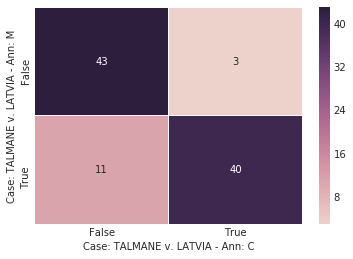

Kohen-'s Kappa Ann: S - Ann: L: 0.7883672039243168
Observed Agreement: 89.40%


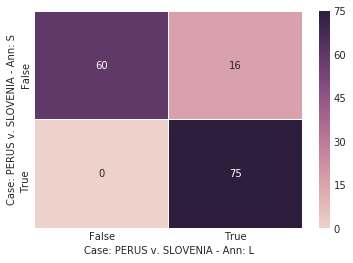

Kohen-'s Kappa Ann: S - Ann: L: 0.7886178861788617
Observed Agreement: 89.42%


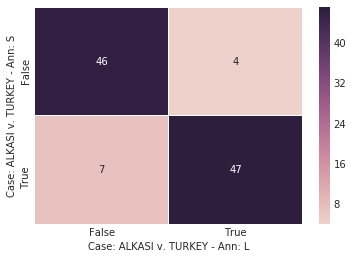

Kohen-'s Kappa Ann: S - Ann: M: 0.7702503681885126
Observed Agreement: 88.46%


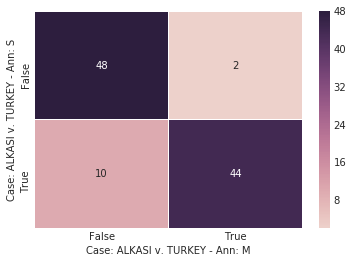

Kohen-'s Kappa Ann: S - Ann: C: 0.7702503681885126
Observed Agreement: 88.46%


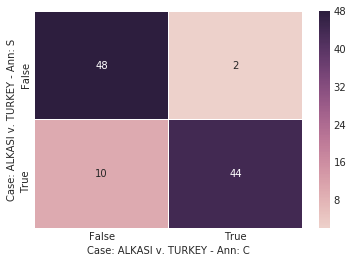

Kohen-'s Kappa Ann: L - Ann: M: 0.9036323202372127
Observed Agreement: 95.19%


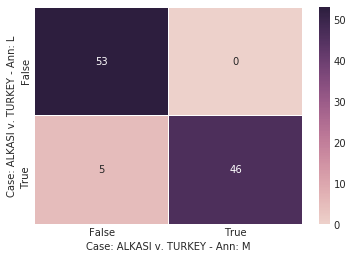

Kohen-'s Kappa Ann: L - Ann: C: 0.826538176426983
Observed Agreement: 91.35%


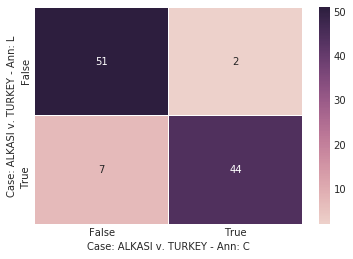

Kohen-'s Kappa Ann: M - Ann: C: 0.8440779610194903
Observed Agreement: 92.31%


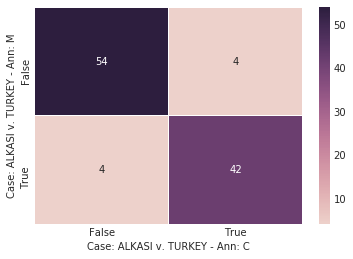

In [9]:
def get_argumentative_sentences(document):
    return [sentence.has_label for sentence in document.sentences]

show_metrics.show_krippendorff_alpha([get_argumentative_sentences(doc)
                                      for doc in all_files.values()])
show_metrics.show_fleiss_kappa([get_argumentative_sentences(doc)
                                      for doc in all_files.values()])
for doc1, doc2 in document_pairs:
    labels1 = get_argumentative_sentences(doc1)
    labels2 = get_argumentative_sentences(doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

In [21]:
print('(Case: TALMANE v. LATVIA - Ann: M, Case: TALMANE v. LATVIA - Ann: C)')
show_metrics.show_krippendorff_alpha([get_argumentative_sentences(doc)
                                      for doc in document_pairs[0]])
print('(Case: PERUS v. SLOVENIA - Ann: S, Case: PERUS v. SLOVENIA - Ann: L)')
show_metrics.show_krippendorff_alpha([get_argumentative_sentences(doc)
                                      for doc in document_pairs[1]])

(Case: TALMANE v. LATVIA - Ann: M, Case: TALMANE v. LATVIA - Ann: C)
Krippendorff Alpha: 0.7125531914893617
(Case: PERUS v. SLOVENIA - Ann: S, Case: PERUS v. SLOVENIA - Ann: L)
Krippendorff Alpha: 0.7866761162296244


----
## Token level comparison

### Identification

Kappa agreement using labels `Args` vs `Non-Arg`.

Krippendorff Alpha: 0.7133401557990061
Fleiss Kappa: 0.004952610231562226


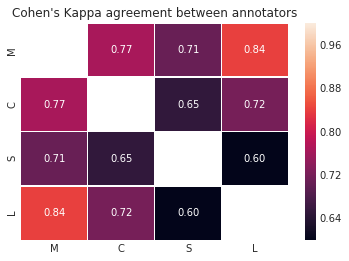

In [11]:
def get_argumentative_words(labels):
    return ['Arg' if x != 'O' else 'O' for x in labels]

show_metrics.show_krippendorff_alpha(
    [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_fleiss_kappa(
    [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_general_agreement(document_pairs, process_function=get_argumentative_words,
                                    annotators=len(ANNOTATORS))

Kohen-'s Kappa Ann: S - Ann: M: 0.7062687097190361
Observed Agreement: 85.32%


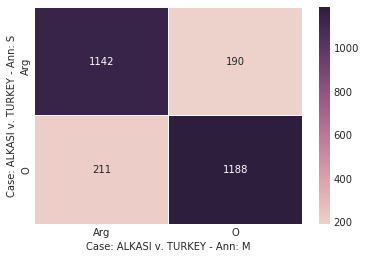

Kohen-'s Kappa Ann: S - Ann: C: 0.6518386948121154
Observed Agreement: 82.61%


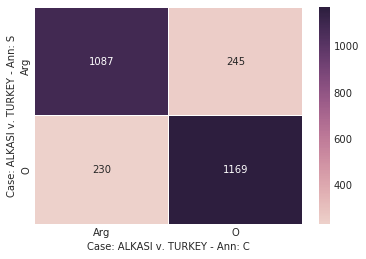

Kohen-'s Kappa Ann: S - Ann: L: 0.5986341188121034
Observed Agreement: 79.86%


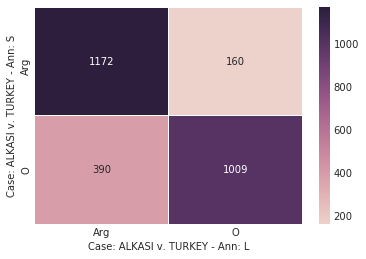

Kohen-'s Kappa Ann: M - Ann: C: 0.7655773869303599
Observed Agreement: 88.28%


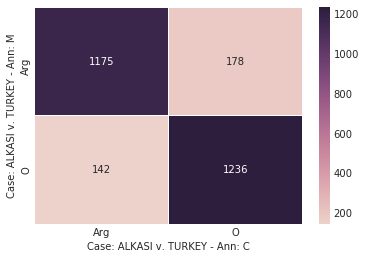

Kohen-'s Kappa Ann: M - Ann: L: 0.8412929190569169
Observed Agreement: 92.05%


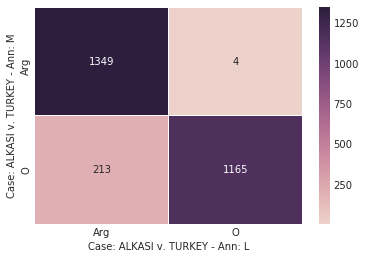

Kohen-'s Kappa Ann: C - Ann: L: 0.7194857534507519
Observed Agreement: 85.90%


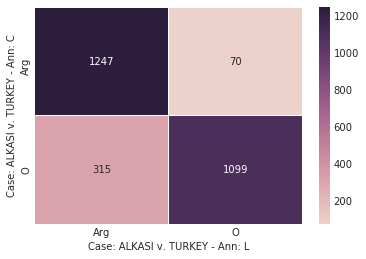

Kohen-'s Kappa Ann: S - Ann: L: 0.7431492022975477
Observed Agreement: 87.55%


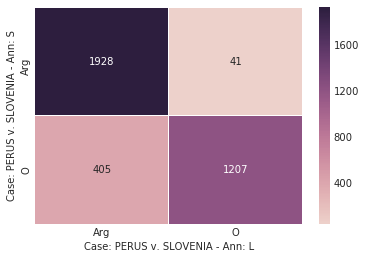

Kohen-'s Kappa Ann: M - Ann: C: 0.5640785176592231
Observed Agreement: 78.03%


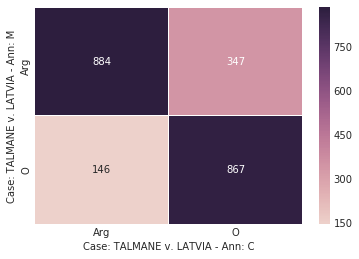

In [13]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    labels1 = get_argumentative_words(labels1)
    labels2 = get_argumentative_words(labels2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

In [23]:
print('(Case: TALMANE v. LATVIA - Ann: M, Case: TALMANE v. LATVIA - Ann: C)')
show_metrics.show_krippendorff_alpha([get_argumentative_words(doc.get_word_label_list()[1])
                                      for doc in document_pairs[0]])
print('(Case: PERUS v. SLOVENIA - Ann: S, Case: PERUS v. SLOVENIA - Ann: L)')
show_metrics.show_krippendorff_alpha([get_argumentative_words(doc.get_word_label_list()[1])
                                      for doc in document_pairs[1]])

(Case: TALMANE v. LATVIA - Ann: M, Case: TALMANE v. LATVIA - Ann: C)
Krippendorff Alpha: 0.5606787512112117
(Case: PERUS v. SLOVENIA - Ann: S, Case: PERUS v. SLOVENIA - Ann: L)
Krippendorff Alpha: 0.7404194828881021


----
### Classification

Kappa agreement using labels `claim`, `major-claim` and `premise`

Krippendorff Alpha: 0.7133401557990061
Fleiss Kappa: 0.0005189052410470321


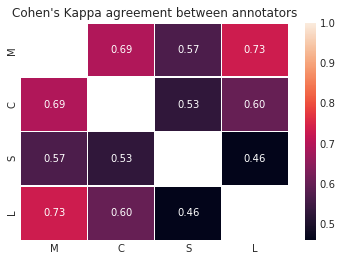

In [15]:
show_metrics.show_krippendorff_alpha(
    [doc.get_word_label_list()[1] for doc in all_files.values()])
show_metrics.show_fleiss_kappa(
    [doc.get_word_label_list() for doc in all_files.values()])
show_metrics.show_general_agreement(document_pairs, annotators=len(ANNOTATORS))

Kohen-'s Kappa Ann: M - Ann: C: 0.48397473767661325
Observed Agreement: 67.74%


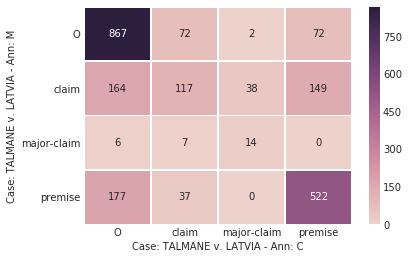

Kohen-'s Kappa Ann: S - Ann: L: 0.5649853926853187
Observed Agreement: 71.63%


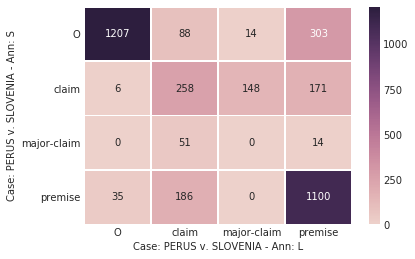

Kohen-'s Kappa Ann: S - Ann: L: 0.4579797281666059
Observed Agreement: 64.63%


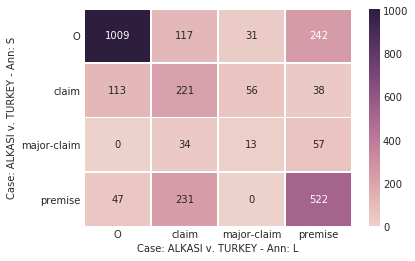

Kohen-'s Kappa Ann: S - Ann: M: 0.5661883530429803
Observed Agreement: 72.76%


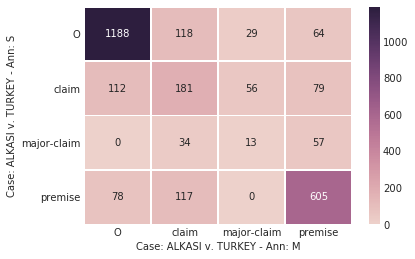

Kohen-'s Kappa Ann: S - Ann: C: 0.5266108042871249
Observed Agreement: 70.67%


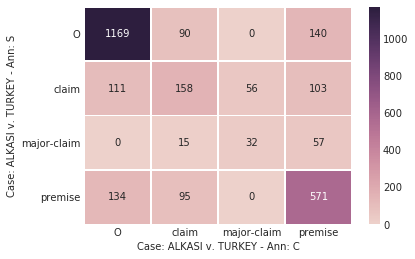

Kohen-'s Kappa Ann: L - Ann: M: 0.7316526060169433
Observed Agreement: 82.46%


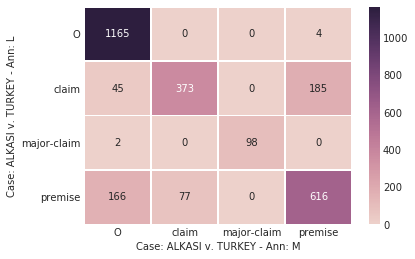

Kohen-'s Kappa Ann: L - Ann: C: 0.5998892506040312
Observed Agreement: 74.08%


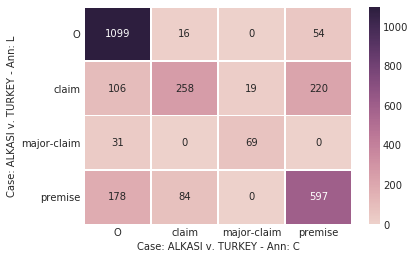

Kohen-'s Kappa Ann: M - Ann: C: 0.6944617255049051
Observed Agreement: 81.00%


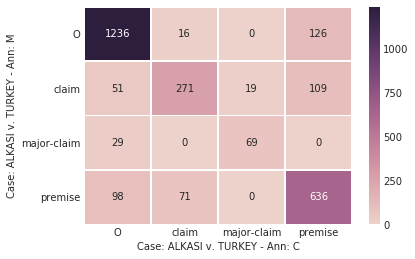

In [18]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

In [ ]:
print('(Case: TALMANE v. LATVIA - Ann: M, Case: TALMANE v. LATVIA - Ann: C)')
show_metrics.show_krippendorff_alpha([get_argumentative_words(doc.get_word_label_list()[1])
                                      for doc in document_pairs[0]])
print('(Case: PERUS v. SLOVENIA - Ann: S, Case: PERUS v. SLOVENIA - Ann: L)')
show_metrics.show_krippendorff_alpha([get_argumentative_words(doc.get_word_label_list()[1])
                                      for doc in document_pairs[1]])

## Simplified labels

Kappa agreement using only labels `claim` and `premise`

Krippendorff Alpha: 0.6161273841481911
Fleiss Kappa: 0.0038210778664100283


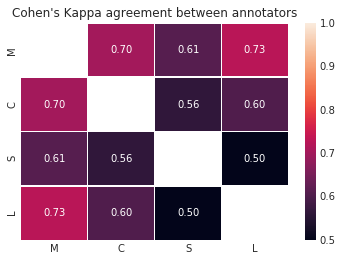

In [17]:
def get_simplified_labels(labels):
    return [x if x != 'major-claim' else 'claim' for x in labels]

show_metrics.show_krippendorff_alpha(
    [get_simplified_labels(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_fleiss_kappa(
    [get_simplified_labels(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_general_agreement(document_pairs, process_function=get_simplified_labels,
                                    annotators=len(ANNOTATORS))

Kohen-'s Kappa Ann: M - Ann: L: 0.7257974653827288
Observed Agreement: 82.46%


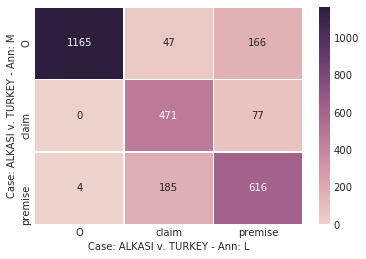

Kohen-'s Kappa Ann: M - Ann: C: 0.7008307506113745
Observed Agreement: 81.69%


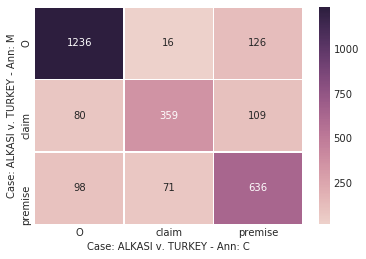

Kohen-'s Kappa Ann: M - Ann: S: 0.6113007978449634
Observed Agreement: 76.05%


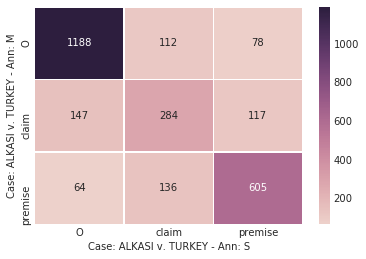

Kohen-'s Kappa Ann: L - Ann: C: 0.6033324844824721
Observed Agreement: 74.77%


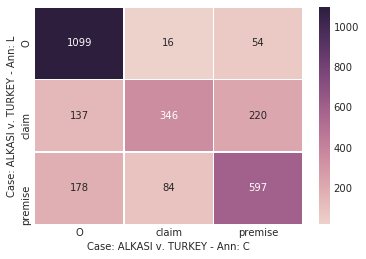

Kohen-'s Kappa Ann: L - Ann: S: 0.4975872234778339
Observed Agreement: 67.92%


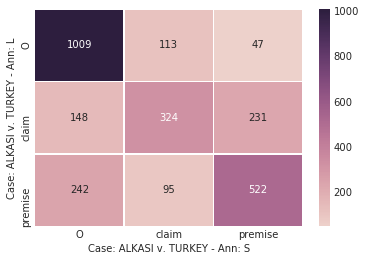

Kohen-'s Kappa Ann: C - Ann: S: 0.5614639615512451
Observed Agreement: 73.27%


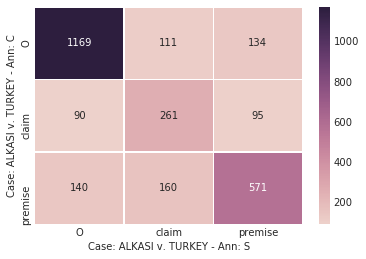

Kohen-'s Kappa Ann: L - Ann: S: 0.6445658431856928
Observed Agreement: 77.19%


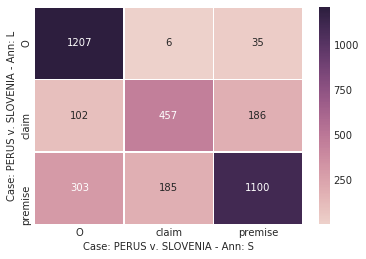

Kohen-'s Kappa Ann: M - Ann: C: 0.5111473443784909
Observed Agreement: 69.74%


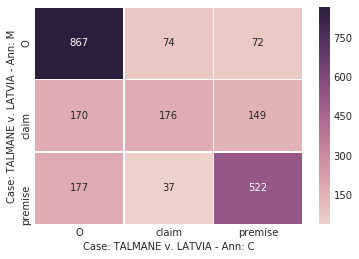

In [17]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    labels1 = get_simplified_labels(labels1)
    labels2 = get_simplified_labels(labels2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

### Attribute analysis

Kohen-'s Kappa Ann: M - Ann: L: 0.6643412510130218
Observed Agreement: 76.74%


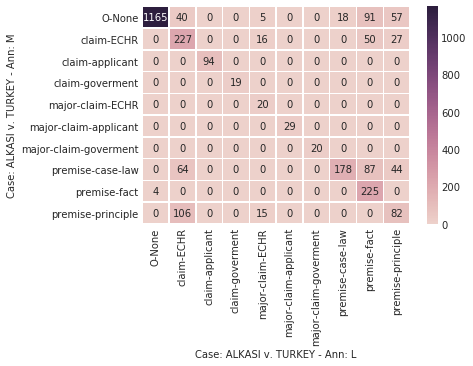

Kohen-'s Kappa Ann: M - Ann: C: 0.6160028330239147
Observed Agreement: 74.00%


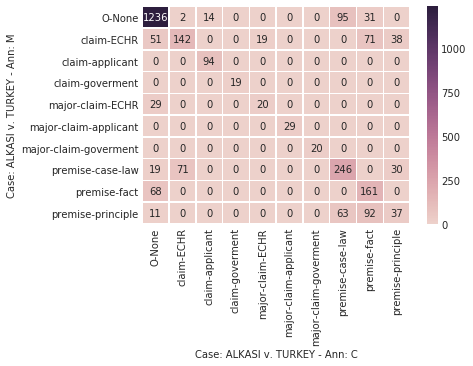

Kohen-'s Kappa Ann: M - Ann: S: 0.4973378967040545
Observed Agreement: 67.68%


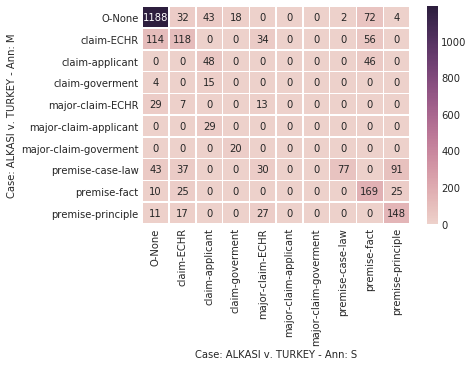

Kohen-'s Kappa Ann: L - Ann: C: 0.5156458900481709
Observed Agreement: 65.25%


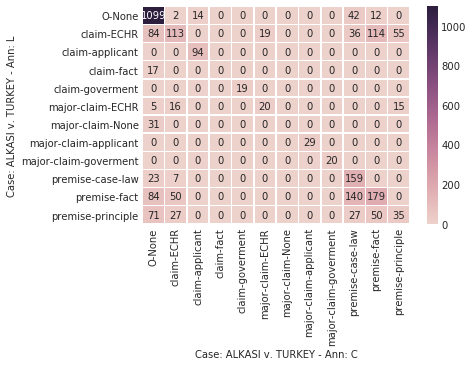

Kohen-'s Kappa Ann: L - Ann: S: 0.4032475861979504
Observed Agreement: 58.99%


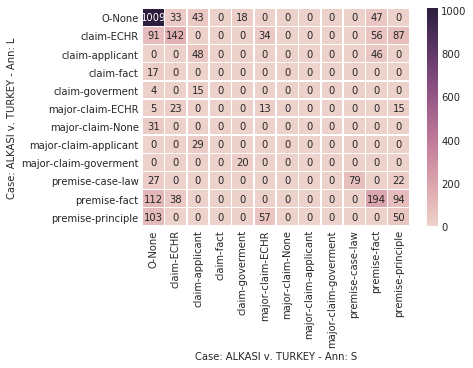

Kohen-'s Kappa Ann: C - Ann: S: 0.3945577645744174
Observed Agreement: 59.46%


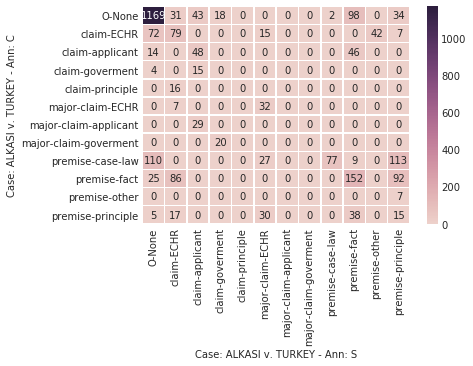

Kohen-'s Kappa Ann: L - Ann: S: 0.3316167110617432
Observed Agreement: 63.93%


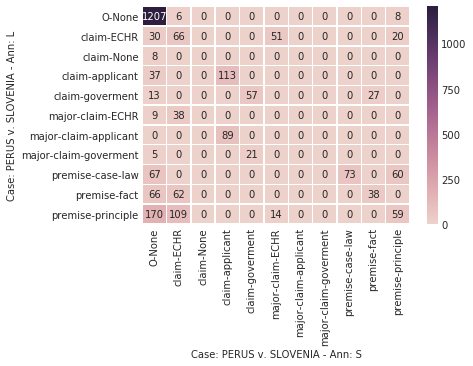

Kohen-'s Kappa Ann: M - Ann: C: 0.4542310207849055
Observed Agreement: 62.84%


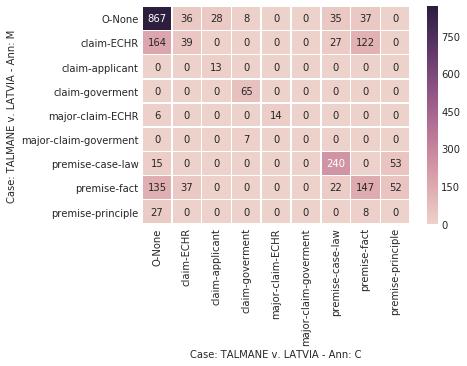

In [26]:
def get_labels_with_attributes(document):
    result = []
    for sentence in document.sentences:
        for label, attribute in zip(sentence.labels, sentence.attributes):
            if attribute is not None:
                attribute = attribute[1]
            result.append('{}-{}'.format(label, attribute))
    return result

for doc1, doc2 in document_pairs:
    labels1, labels2 = get_labels_with_attributes(doc1), get_labels_with_attributes(doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

## Qualitative error analysis

In [10]:
def sample_sentences(doc1, doc2, label1, label2, tolerance=0):
    """Samples sentences where label1 was confused with label2 in
    doc1 and doc2 respectively.
    """
    total_errors = 0
    for sentence1, sentence2 in zip(doc1.sentences, doc2.sentences):
        indices1 = [i for i, x in enumerate(sentence1.labels) if x == label1]
        if len(indices1) == 0:
            continue
        indices2 = [i for i, x in enumerate(sentence2.labels) if x == label2]
        if len(indices2) == 0 or len(set(indices1).intersection(indices2)) < tolerance:
            continue
        total_errors += len(set(indices1).intersection(indices2))
        # Print both sentences
        print(sentence1.pretty_print(styles=STYLES))
        print(sentence2.pretty_print(styles=STYLES))
        print('---')
    print('TOTAL ERRORS:', total_errors)

Examples labeled as `premise` in one document and as `O` in the other

In [11]:
document_pairs

[(Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: C)]

In [12]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'O', 'premise', tolerance=1)

{The second aspect of the protection afforded by Article 6 § 2 requires that a person must be treated in a manner that is consistent with his or her innocence after the conclusion of criminal proceedings which have terminated in an acquittal or discontinuation }( {ibid. , § 103 ) }. 
The second aspect of the protection afforded by Article 6 § 2 requires that {a person must be treated in a manner that is consistent with his or her innocence after the conclusion of criminal proceedings which have terminated in an acquittal or discontinuation ( ibid. , § 103 ) . }
---
( {see Allen , cited above , § 104 ) }. 
{( see Allen , cited above , § 104 ) . }
---
In the application of the above principles to the present case , the Court will have regard to the applicability of Article 6 § 2 to the impugned decision of the Bakırköy Labour Court by determining whether a link existed between the criminal proceedings and the subsequent labour proceedings . 
In the application of the above principles to 